In [34]:
!pip install seaborn

You should consider upgrading via the 'C:\Users\rakes\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [35]:
#regression
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

import seaborn as sns

In [4]:
file_path=r"C:\Users\rakes\Downloads\House Price India.csv\House Price India.csv"
df=pd.read_csv(file_path)
print(df.head())

           id   Date  number of bedrooms  number of bathrooms  living area  \
0  6762810145  42491                   5                 2.50         3650   
1  6762810635  42491                   4                 2.50         2920   
2  6762810998  42491                   5                 2.75         2910   
3  6762812605  42491                   4                 2.50         3310   
4  6762812919  42491                   3                 2.00         2710   

   lot area  number of floors  waterfront present  number of views  \
0      9050               2.0                   0                4   
1      4000               1.5                   0                0   
2      9480               1.5                   0                0   
3     42998               2.0                   0                0   
4      4500               1.5                   0                0   

   condition of the house  ...  Built Year  Renovation Year  Postal Code  \
0                       5  ...    

In [20]:
categorical_cols=df.select_dtypes(include=['object']).columns
print("categorical columns",categorical_cols)

categorical columns Index([], dtype='object')


In [ ]:
df_encoded=pd.get_dummies(df,columns

In [14]:
X=df.iloc[:,1:]
Y=df.iloc[:,0]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
print(X_train,X_test,Y_train,Y_test)

        Date  number of bedrooms  number of bathrooms  living area  lot area  \
6459   42587                   3                 2.50         2500     51836   
10885  42659                   4                 1.75         1275     20000   
1369   42512                   4                 1.50         1930     15531   
740    42503                   2                 1.00          700      6000   
3474   42544                   4                 2.25         2210      9371   
...      ...                 ...                  ...          ...       ...   
5191   42568                   4                 2.50         2500      8540   
13418  42706                   3                 1.00         1340     10035   
5390   42572                   3                 2.25         3270    168000   
860    42505                   2                 2.50         1310      1500   
7270   42600                   3                 1.75         1510      6597   

       number of floors  waterfront pre

In [17]:
df.columns

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

In [18]:
dt_regressor=DecisionTreeRegressor(max_depth=5,random_state=42)
dt_regressor.fit(X_train,Y_train)
Y_pred=dt_regressor.predict(X_test)
print(Y_pred)

[6.76283008e+09 6.76281736e+09 6.76281583e+09 ... 6.76281119e+09
 6.76282886e+09 6.76281455e+09]


In [22]:
#evaluate
mse=mean_squared_error(Y_test,Y_pred)
print("mean square error",mse)

mean square error 42513.99504675712


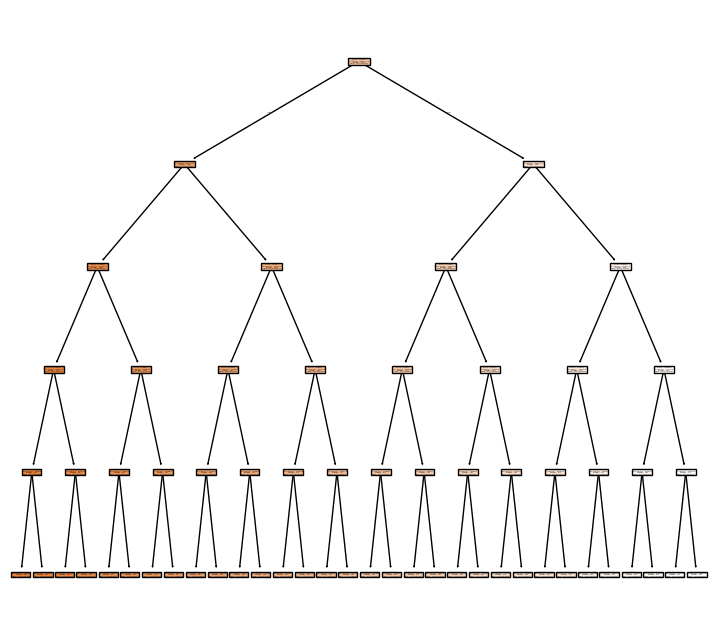

In [26]:
plt.figure(figsize=(9,8))
tree.plot_tree(dt_regressor,filled=True,feature_names=X.columns)
plt.show()

In [36]:
print("first 1o prices",df["number of bedrooms"].head(10))
print(df["number of bedrooms"].describe())
plt.figure(figsize=(10,6))
sns.hisplot(df["number of bedrooms"],bins=30,kde=True,color="blue")
plt.xlabel("price")
plt.ylabel("frequency")
plt.titlt("distribiion of houses prices")
plt.show()

first 1o prices 0    5
1    4
2    5
3    4
4    3
5    3
6    5
7    3
8    3
9    4
Name: number of bedrooms, dtype: int64
count    14620.000000
mean         3.379343
std          0.938719
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: number of bedrooms, dtype: float64


AttributeError: module 'seaborn' has no attribute 'hisplot'

<Figure size 1000x600 with 0 Axes>

In [37]:
print("first 10 pridicted  prices",Y_pred[:10])
predicted_prices=pd.DataFrame(Y_pred)
plt.figure(figsize=(10,6))
sns.hisplot(df["number of bedrooms"],bins=30,kde=True,color="blue")
plt.xlabel("price")
plt.ylabel("frequency")
plt.titlt("distribiion of houses prices")
plt.show()

first 10 pridicted  prices [6.76283008e+09 6.76281736e+09 6.76281583e+09 6.76281736e+09
 6.76281518e+09 6.76282886e+09 6.76281185e+09 6.76281807e+09
 6.76281119e+09 6.76281736e+09]


AttributeError: module 'seaborn' has no attribute 'hisplot'

<Figure size 1000x600 with 0 Axes>